In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sn

In [101]:
import pickle

In [67]:
df = pd.read_csv("yelebhai.csv")
df1 = pd.DataFrame()

In [68]:
df1['cases'] = df['totalcases']
df1['time'] = df['week_start_date']

In [98]:
test = df['totalcases'][200:221]

In [69]:

df1['time'] = pd.to_datetime(df1['time'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   cases   1456 non-null   int64         
 1   time    1456 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 22.9 KB


In [ ]:
df1.set_index('time',inplace=True)

In [71]:
df1 = df1.iloc[1:200]

In [97]:
df1

,cases,forecast
time,,
1990-05-07,5,NaN
1990-05-14,4,7.088898
1990-05-21,3,5.986899
1990-05-28,6,5.045715
1990-06-04,2,7.252359
...,...,...
1994-01-29,36,36.574855
1994-02-05,39,30.924116
1994-02-12,25,37.715565


# Visualize

<AxesSubplot:xlabel='time'>

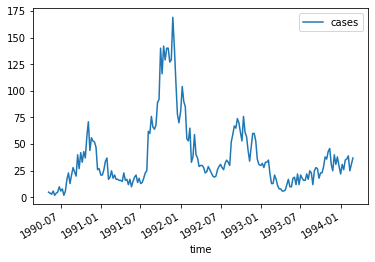

In [18]:
df1.plot()

In [19]:
from statsmodels.tsa.stattools import adfuller

In [21]:
def adfuller_test(cases):
    result = adfuller(cases)
    labels = ['ADF test statistic','p-value','#lags Used','Number of observations used']
    for value,label in zip(result,labels):
        print(label+":"+str(value))
    if result[1] <= 0.05:
        print("stationary")
    else:
        print("not stationary")
    

In [22]:
adfuller_test(df1['cases'])

ADF test statistic:-3.4362914400468987
p-value:0.009782187121363584
#lags Used:8
Number of observations used:190
stationary


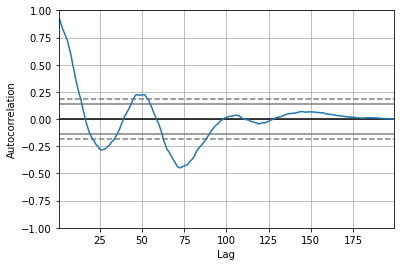

In [23]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df1['cases'])
mp.show()

In [24]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels as sm

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


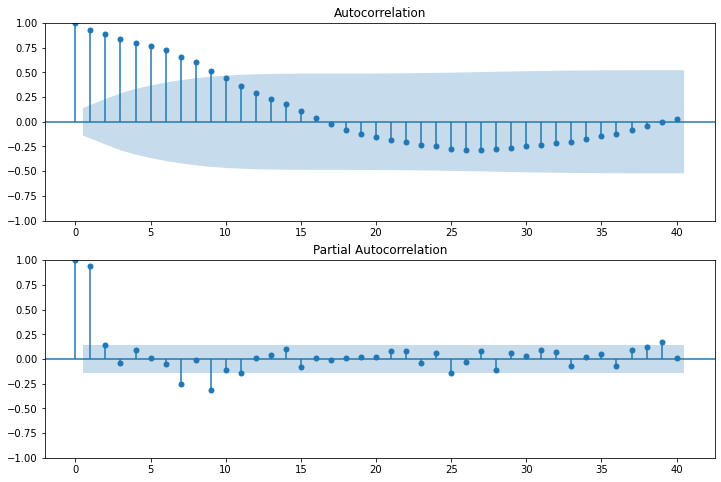

In [25]:
fig = mp.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsaplots.plot_acf(df1['cases'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsaplots.plot_pacf(df1['cases'],lags=40,ax=ax2)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
d_d = seasonal_decompose(df1['cases'].asfreq('WS'),model='additive')
d_d.plot();


In [16]:
from statsmodels.tsa.arima.model import ARIMA

In [27]:
model1 = ARIMA(df1['cases'],order=(2,0,15))
model_fit1 = model1.fit()

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [28]:
model_fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  cases   No. Observations:                  199
Model:                ARIMA(2, 0, 15)   Log Likelihood                -740.887
Date:                Wed, 15 Mar 2023   AIC                           1519.775
Time:                        23:27:36   BIC                           1582.347
Sample:                             0   HQIC                          1545.099
                                - 199                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.4957     11.704      3.204      0.001      14.557      60.435
ar.L1          1.1066      1.325      0.835      0.404      -1.490       3.703
ar.L2         -0.2504      1.109     -0.226      0.821      -2.424       1.923
ma.L1         -0.3514      1.325     -0.265      0.791      -2.949       2.246
ma.L2          0.0961      0.144      0.666      0.505      -0.187       0.379
ma.L3          0.0156      0.113      0.138      0.890      -0.206       0.238
ma.L4          0.0988      0.080      1.237      0.216      -0.058       0.255
ma.L5          0.1815      0.152      1.193      0.233      -0.117       0.480
ma.L6          0.2393      0.265      0.902      0.367      -0.280       0.759
ma.L7         -0.0049      0.395     -0.012      0.990      -0.778       0.768
ma.L8          0.2799      0.110      2.548      0.011       0.065       0.495
ma.L9         -0.0278      0.366     -0.076      0.940      -0.746       0.690
ma.L10         0.1264      0.100      1.259      0.208      -0.070       0.323
ma.L11         0.0311      0.173      0.180      0.857      -0.308       0.371
ma.L12         0.1327      0.103      1.286      0.199      -0.070       0.335
ma.L13         0.0380      0.212      0.179      0.858      -0.378       0.454
ma.L14         0.1974      0.102      1.928      0.054      -0.003       0.398
ma.L15         0.0076      0.339      0.023      0.982      -0.658       0.673
sigma2        98.3277      8.203     11.986      0.000      82.249     114.406
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                65.82
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.53   Skew:                             0.56
Prob(H) (two-sided):                  0.01   Kurtosis:                         5.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [75]:
df1

,cases,forecast
time,,
1990-05-07,5,NaN
1990-05-14,4,7.088898
1990-05-21,3,5.986899
1990-05-28,6,5.045715
1990-06-04,2,7.252359
...,...,...
1994-01-29,36,36.574855
1994-02-05,39,30.924116
1994-02-12,25,37.715565


In [43]:
fr = model_fit1.forecast(20,alpha=0.05)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [44]:
fr

199    37.437901
200    37.871116
201    39.688155
202    36.574582
203    42.031319
204    39.799323
205    44.463246
206    45.122686
207    47.556738
208    46.512838
209    46.907890
210    44.481835
211    43.963078
212    44.586820
213    43.787196
214    42.682210
215    41.659660
216    40.804802
217    40.114870
218    39.565453
Name: predicted_mean, dtype: float64

<AxesSubplot:xlabel='time'>

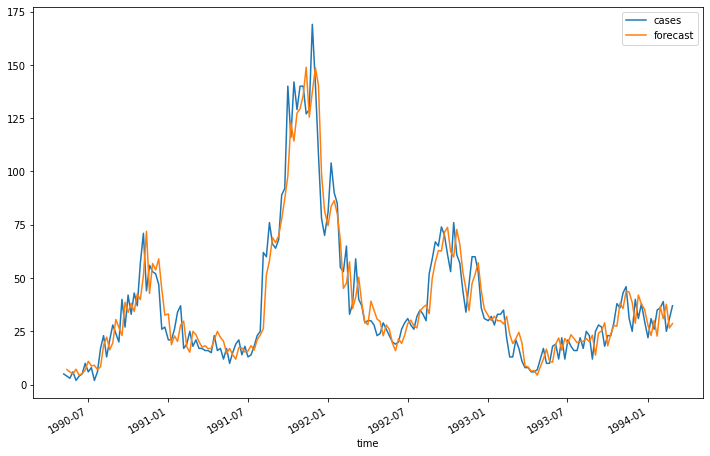

In [74]:

df1['forecast'] = model_fit1.predict(start=1,end=198)
df1[['cases','forecast']].plot(figsize=(12,8))


In [83]:

df2 = df1.reset_index()
df2 = df2[['cases','forecast']]
df2

,cases,forecast
0,5,NaN
1,4,7.088898
2,3,5.986899
3,6,5.045715
4,2,7.252359
...,...,...
194,36,36.574855
195,39,30.924116
196,25,37.715565
197,31,26.579530


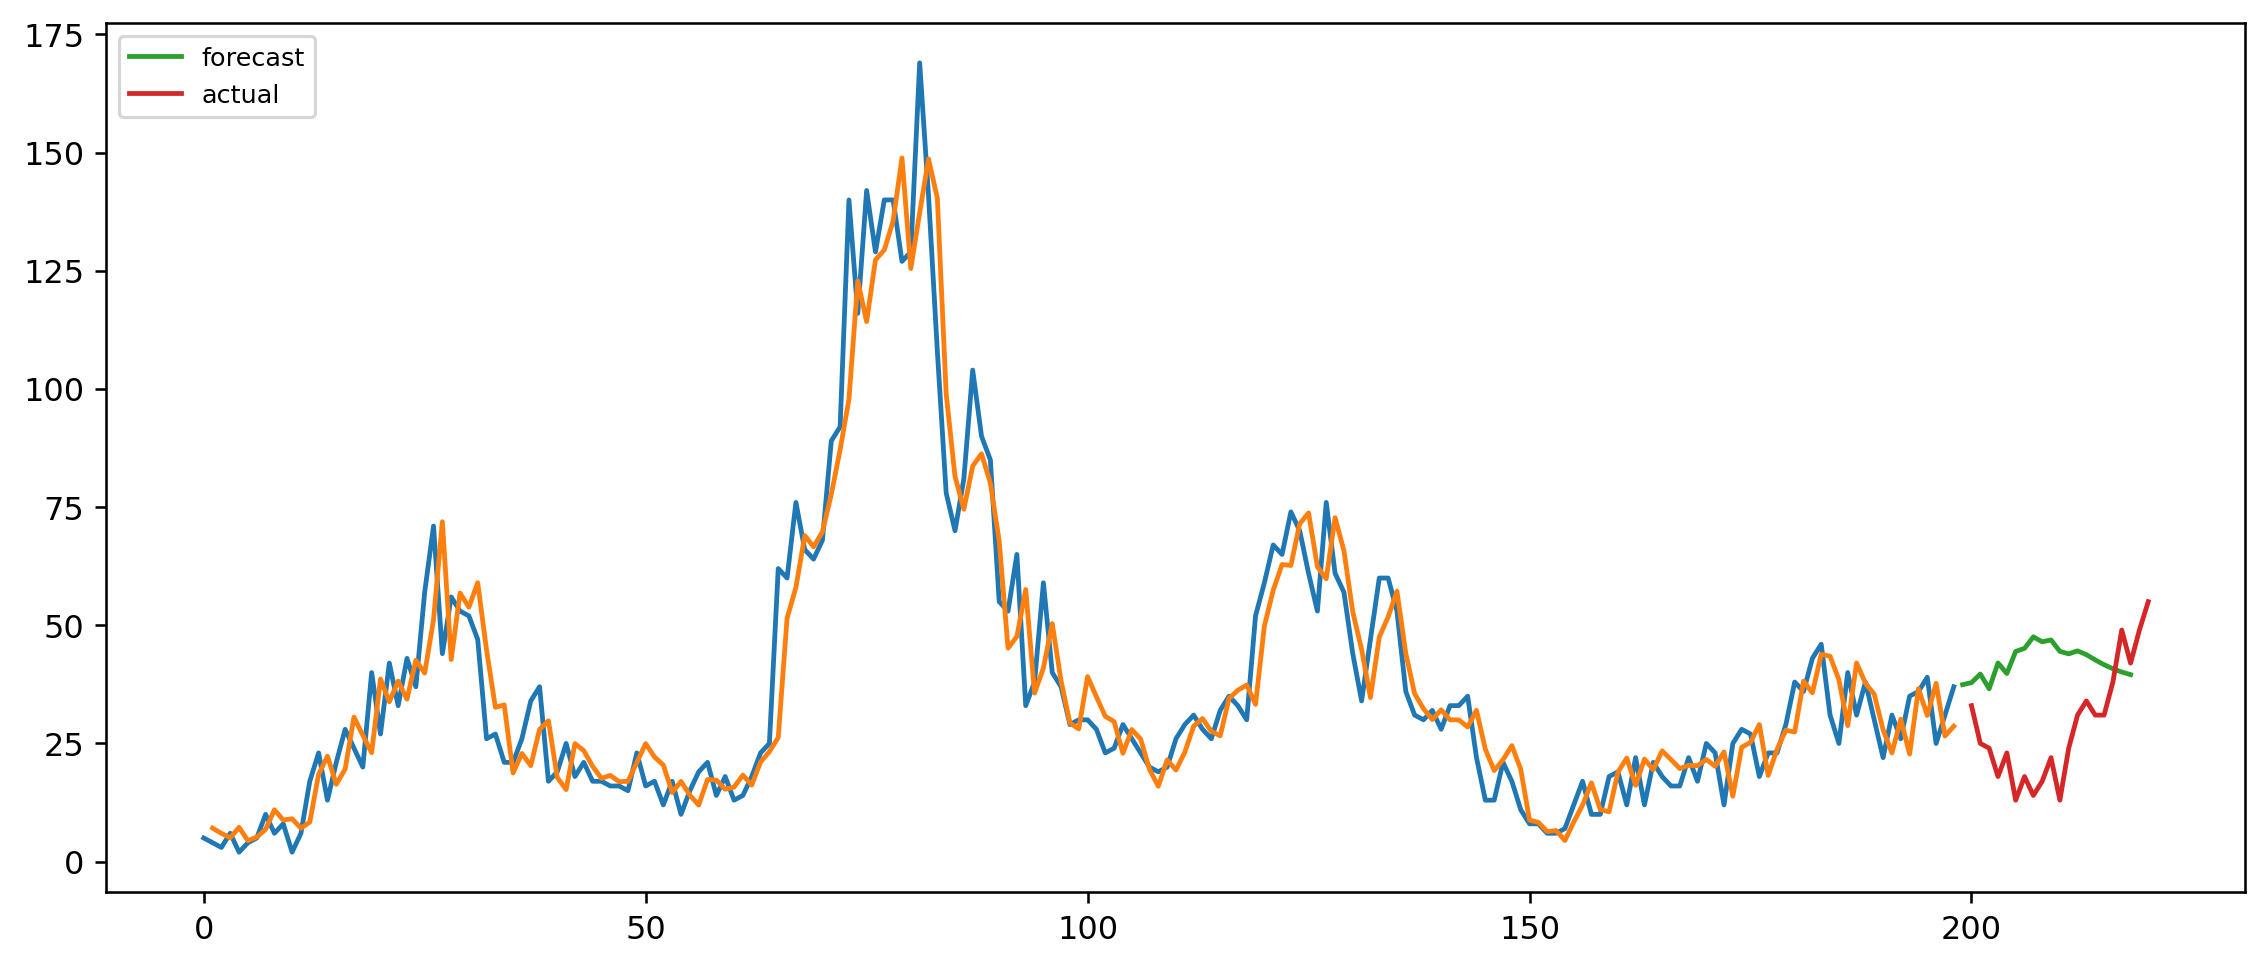

In [99]:
mp.figure(figsize=(12,5), dpi=230)
mp.plot(df2[['cases','forecast']])
mp.plot(fr,label='forecast')
mp.plot(test,label='actual')
mp.legend(loc='upper left', fontsize=8)
mp.plot()
mp.show()

In [103]:
pickle.dump(model_fit1,open('arima_disease_predict.sav','wb'))



In [37]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.eval_measures import rmse

# Disease Prediction using Weather Data:

In [6]:
df

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,totalcases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


In [7]:
df['totalcases'].quantile(q=0.65)

20.0

In [8]:
df['totalcases'][df['totalcases']>20]

14      23
16      21
17      28
18      24
20      40
        ..
1370    35
1381    29
1382    35
1383    30
1385    21
Name: totalcases, Length: 490, dtype: int64

<AxesSubplot:xlabel='totalcases'>

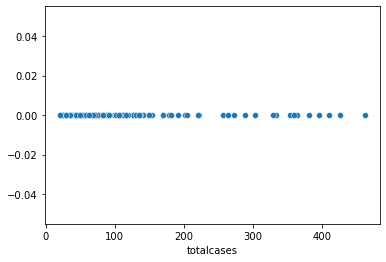

In [9]:
sn.scatterplot(x=df['totalcases'][df['totalcases']>20],y=0)

In [10]:
df['Malaria_chances'] = 0 
df['Malaria_chances'][df['totalcases']>20] = 1 


C:\Users\HP\AppData\Local\Temp\ipykernel_16484\668601295.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Malaria_chances'][df['totalcases']>20] = 1


In [11]:
df.drop(['city','year','weekofyear'],axis=1,inplace=True)

In [12]:
df['totalcases'].describe()

count    1456.000000
mean       24.675137
std        43.596000
min         0.000000
25%         5.000000
50%        12.000000
75%        28.000000
max       461.000000
Name: totalcases, dtype: float64

In [13]:
df['Predict'] = df['totalcases']/461

In [14]:
df['Predict'][df['Predict']<0.03].count()

782

In [16]:
df2 = df[['totalcases','Malaria_chances']]

In [18]:
df.drop(['totalcases','Malaria_chances'],axis=1,inplace=True)

In [19]:
df

,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,Predict
0,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,0.008677
1,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,0.010846
2,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,0.008677
3,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,0.006508
4,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,0.013015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,296.825714,309.7,...,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,0.010846
1452,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,296.452857,308.5,...,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,0.017354
1453,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,295.501429,305.5,...,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,0.002169
1454,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,295.324286,306.1,...,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,0.002169


In [ ]:
dd4 = df(['ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw','reanalysis_air_temp_k','reanalysis_dew_point_temp_k','reanalysis_specific_humidity_g_per_kg',' '])

In [20]:
dd1 = pd.read_csv('yelebhai.csv')
dd1

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,totalcases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


<AxesSubplot:xlabel='weekofyear', ylabel='station_avg_temp_c'>

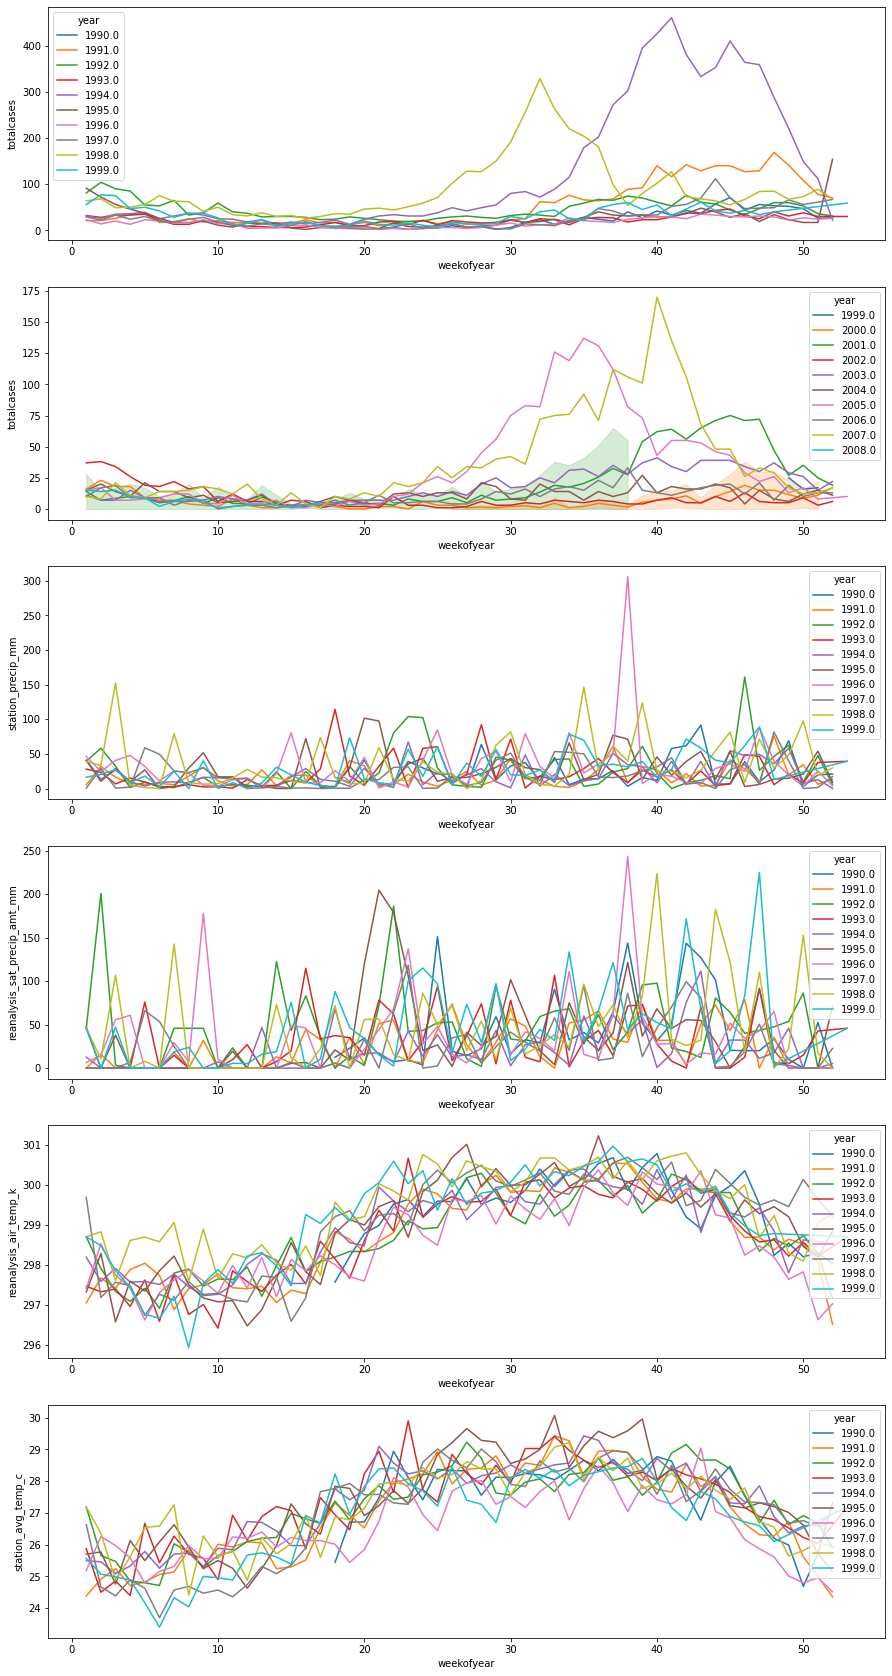

In [21]:
fig, axes = mp.subplots(6,1, figsize=(15,30))
sn.lineplot(x=dd1['weekofyear'],y=dd1['totalcases'],hue=dd1['year'][0:500],ax=axes[0],palette ="tab10")
sn.lineplot(x=dd1['weekofyear'],y=dd1['totalcases'],hue=dd1['year'][500:1000],ax=axes[1],palette ="tab10")
sn.lineplot(x=dd1['weekofyear'],y=dd1['station_precip_mm'],hue=dd1['year'][0:500],ax=axes[2],palette ="tab10")
sn.lineplot(x=dd1['weekofyear'],y=dd1['reanalysis_sat_precip_amt_mm'],hue=dd1['year'][0:500],ax=axes[3],palette ="tab10")
sn.lineplot(x=dd1['weekofyear'],y=dd1['reanalysis_air_temp_k'],hue=dd1['year'][0:500],ax=axes[4],palette ="tab10")
sn.lineplot(x=dd1['weekofyear'],y=dd1['station_avg_temp_c'],hue=dd1['year'][0:500],ax=axes[5],palette ="tab10")


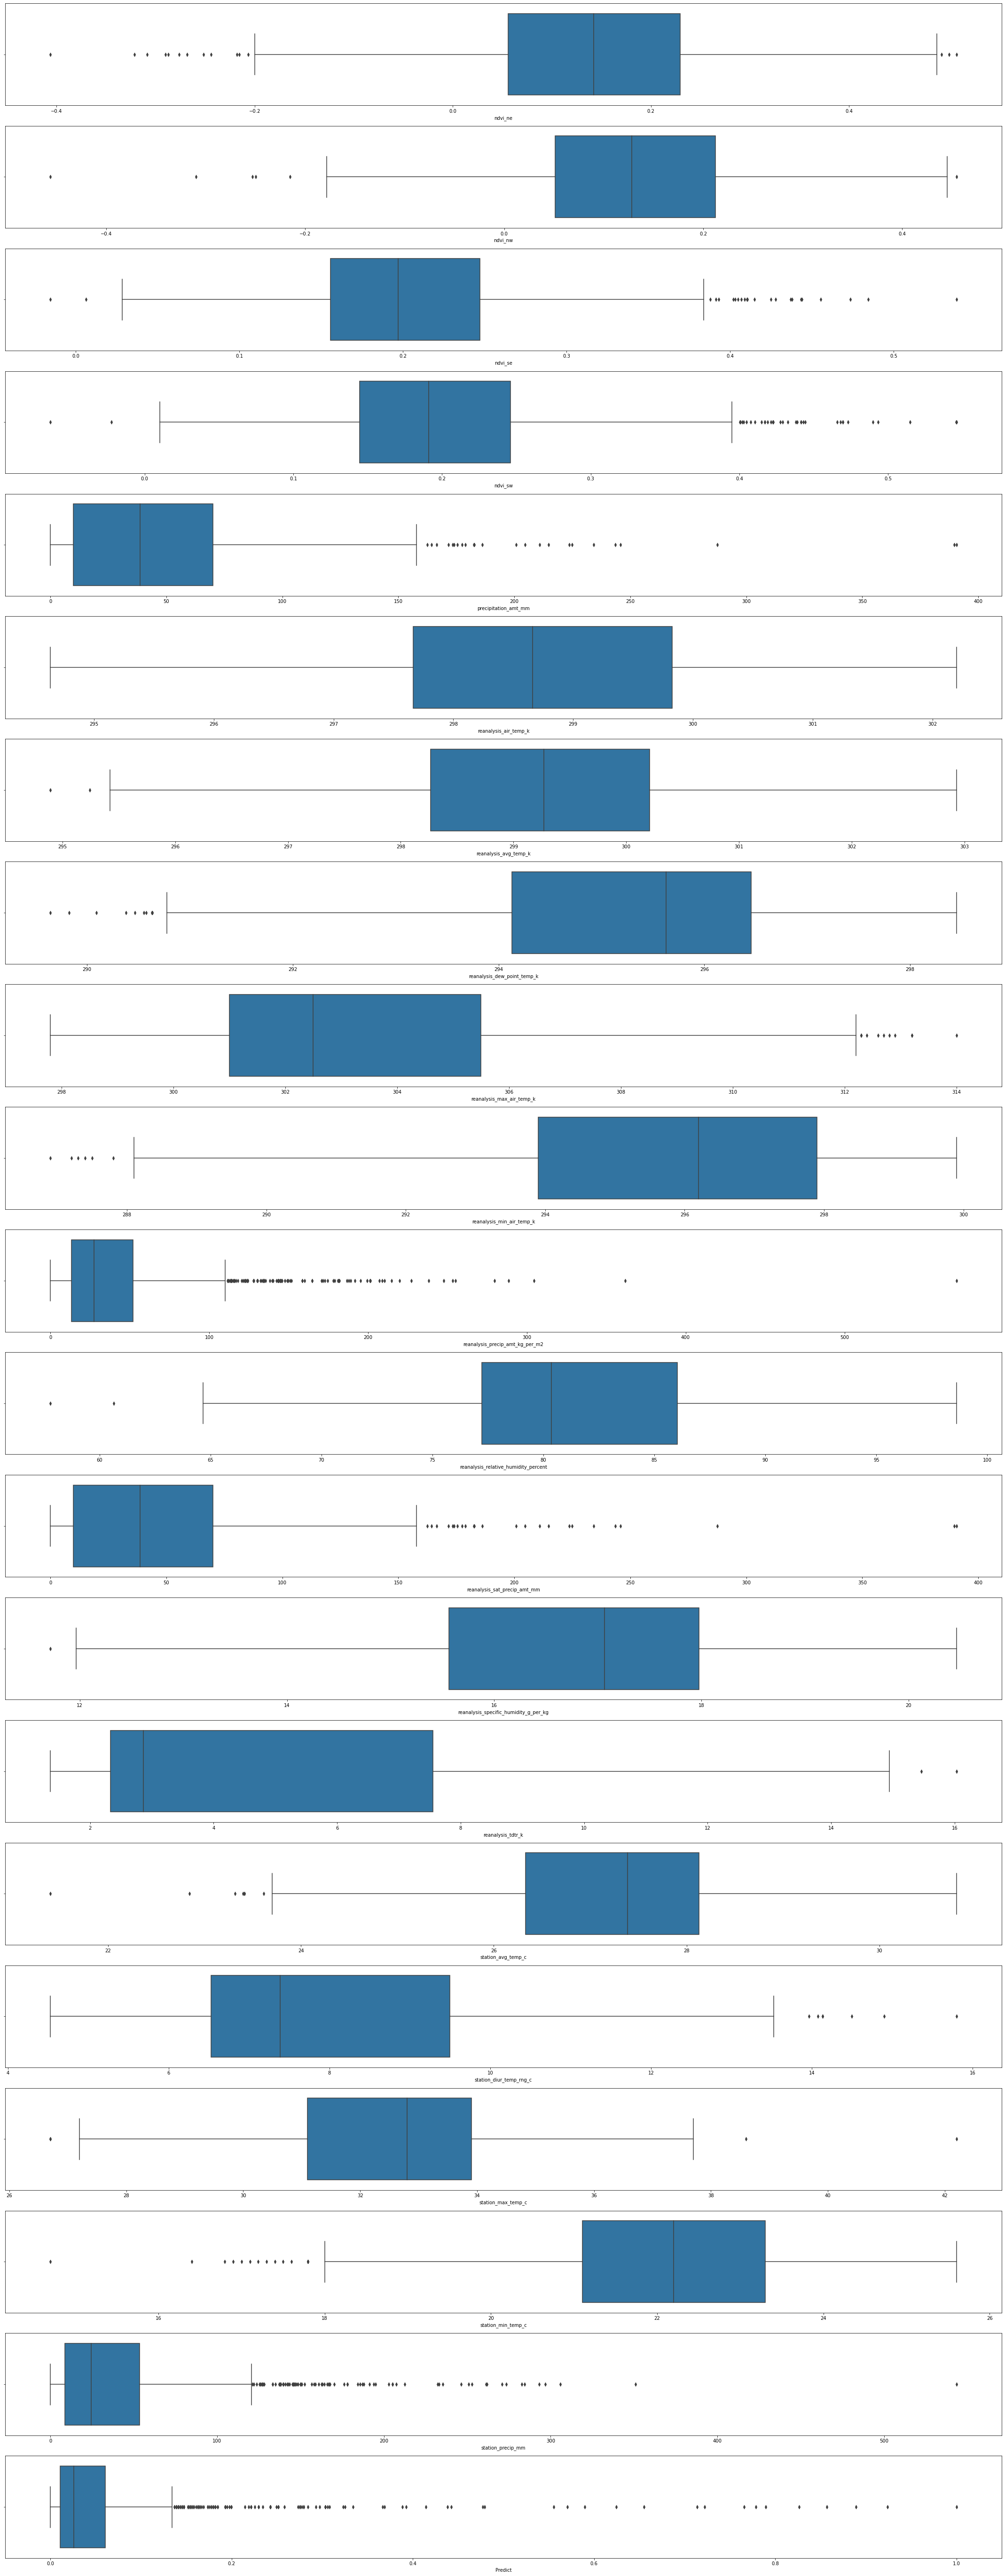

In [83]:
fig, axes = mp.subplots(21,1, figsize=(38, 100))
j=0
for i in df.columns[1:]:
    sn.boxplot(x=df[i] ,ax=axes[j])
    j=j+1

In [68]:
df['Predict'][df['Predict']>0.15].count()

103

<AxesSubplot:>

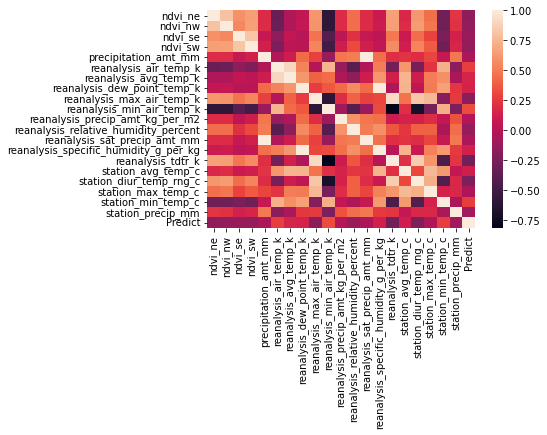

In [91]:
corr = df.corr()
sn.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [59]:
df.drop(['reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k','reanalysis_dew_point_temp_k'],axis=1,inplace=True)

In [60]:
from sklearn.preprocessing import MinMaxScaler

In [62]:
scaler = MinMaxScaler()
use = df.iloc[:,1:13]
df_pre = scaler.fit_transform(use)

In [85]:

df.columns

Index(['precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_max_air_temp_k',
       'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'Predict'],
      dtype='object')

In [64]:
df_res = df['Predict']

In [65]:
df_res

0       0.008677
1       0.010846
2       0.008677
3       0.006508
4       0.013015
          ...   
1451    0.010846
1452    0.017354
1453    0.002169
1454    0.002169
1455    0.008677
Name: Predict, Length: 1456, dtype: float64

In [95]:
df2['Malaria_chances'][df2['Malaria_chances']==1]
df2.iloc[14]
df['predict' > 0]

precipitation_amt_mm                     28.800000
reanalysis_air_temp_k                   300.391429
reanalysis_avg_temp_k                   300.478571
reanalysis_max_air_temp_k               302.500000
reanalysis_min_air_temp_k               298.800000
reanalysis_precip_amt_kg_per_m2          20.000000
reanalysis_relative_humidity_percent     79.650000
reanalysis_sat_precip_amt_mm             28.800000
station_avg_temp_c                       28.200000
station_diur_temp_rng_c                   7.557143
station_max_temp_c                       33.300000
station_min_temp_c                       23.300000
station_precip_mm                        11.400000
Predict                                   0.049892
Name: 14, dtype: float64

In [67]:
from sklearn import model_selection
from sklearn.metrics import accuracy_score

In [68]:
X_test,X_train,Y_test,Y_train = model_selection.train_test_split(df_pre,df_res)

In [69]:
X_test1,X_train1,Y_test1,Y_train1 = model_selection.train_test_split(df_pre,df_res1)

In [135]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train1, Y_train1)
y_pred = knn.predict(X_test1)


In [138]:
acc_knn = round(accuracy_score(y_pred, Y_test1) * 100, 2)
print(acc_knn)

64.19


In [142]:
knn?

In [ ]:
knn.predict()

In [86]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(X_train1, Y_train1)
y_pred = randomforest.predict(X_test1)
acc_randomforest = round(accuracy_score(y_pred, Y_test1) * 100, 2)
print(acc_randomforest)

69.05


In [87]:
pickle.dump(randomforest,open('model4.sav','wb'))

In [141]:
randomforest?

In [96]:
from sklearn.svm import LinearSVC

linear_svc = LinearSVC(max_iter=1200000)
linear_svc.fit(X_train1, Y_train1)
y_pred = linear_svc.predict(X_test1)
acc_linear_svc = round(accuracy_score(y_pred, Y_test1) * 100, 2)
print(acc_linear_svc)

69.78


In [98]:
X_test1[1]

array([0.90651558, 0.83911111, 0.35802469, 0.96153846, 0.01454864,
       0.39389698, 0.04495648, 0.81914894, 0.26742712, 0.46451613,
       0.88990826, 0.01877416])

In [74]:
pickle.dump(linear_svc,open('Model2.sav','wb'))

In [75]:
pickle.dump(scaler,open("scaler2.sav",'wb'))

In [146]:
LinearSVC?`

In [78]:
X_test2,X_train2,Y_test2,Y_train2 = model_selection.train_test_split(df_pre,df_res1,random_state = 0)

In [76]:
from sklearn.ensemble import GradientBoostingClassifier

In [79]:
gb = GradientBoostingClassifier(random_state=0,learning_rate=0.01)
gb.fit(X_train2, Y_train2)
y_pred = gb.predict(X_test2)
acc_gb = round(accuracy_score(y_pred, Y_test2) * 100, 2)
print(acc_gb)


67.86


In [83]:
pickle.dump(gb,open('Model3.sav','wb'))

In [166]:
y_pred = gb.predict(X_test1)
acc_gb1 = round(accuracy_score(y_pred, Y_test1) * 100, 2)
print(acc_gb)


67.31


In [160]:
from xgboost import XGBClassifier

In [164]:
xgb = XGBClassifier(random_state=0,learning_rate=0.01)
xgb.fit(X_train2, Y_train2)
y_pred = xgb.predict(X_test2)
acc_xgb = round(accuracy_score(y_pred, Y_test2) * 100, 2)
print(acc_xgb)

66.85


In [80]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [81]:
hgb = HistGradientBoostingClassifier(random_state=0,learning_rate=0.01)
hgb.fit(X_train2, Y_train2)
y_pred = hgb.predict(X_test2)
acc_hgb = round(accuracy_score(y_pred, Y_test2) * 100, 2)
print(acc_hgb)

67.03


In [106]:
from sklearn.linear_model import LinearRegression
dml = LinearRegression()
dml.fit(X_train,Y_train)

LinearRegression()

In [107]:
dml.coef_

array([ 0.01063986,  0.04306427,  0.01573841, -0.00591433,  0.03746855,
       -0.19732713, -0.02110139, -0.13824086,  0.02317345,  0.03781007,
        0.01114336, -0.3403311 ,  0.03746855,  0.3839402 , -0.08511078,
        0.03686405, -0.04903168,  0.11873313,  0.03169356])

In [109]:
dml.intercept_

0.10498537761543719

In [111]:
dml.score(X_test,Y_test)

0.10646981566152058